In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy.ndimage.measurements import center_of_mass as cm
from scipy.signal import savgol_filter as sf

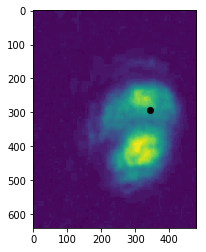

In [41]:
#questo significa che io volgio solo il canale 0, cioè il rosso
img=mpimg.imread('dati/fotogrammi/60.jpg')[:,:,0]
cm1=cm(img)
plt.plot(cm1[0],cm1[1],'o',color='black')
plt.imshow(img)
plt.close()

In [50]:
lung=4325
centro_di_massa=[]
f=open('dati/centro_di_massa.txt','a')
for i in range(lung):
    img=mpimg.imread('dati/fotogrammi/'+str(i)+'.jpg')[:,:,0]
    cm1=cm(img)
    print(cm1[0],'\t',cm1[1],file=f)

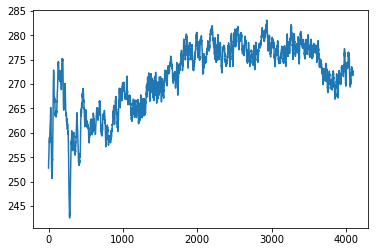

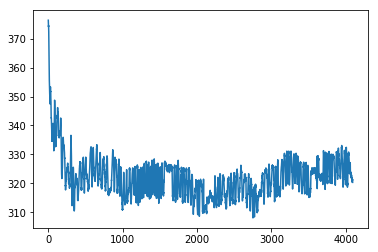

In [114]:
oscillazzioni=110

f.close()
taglio1=int(5*lung/(120+49))
taglio2=int((120+45)*lung/(120+49))
cmx,cmy=np.genfromtxt('dati/centro_di_massa.txt',unpack='True')
cmx,cmy=cmx[taglio1:taglio2],cmy[taglio1:taglio2]
iniz=1500
plt.plot(cmy)
#plt.xlim(iniz,iniz+500)
plt.show()
plt.plot(cmx)
#plt.xlim(iniz,iniz+500)

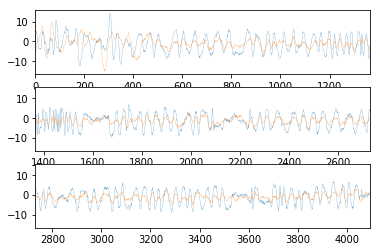

In [120]:
plt.close()
a=3
for i in range(a):
    plt.subplot(311+i)
    plt.plot(cmx-sf(cmx,501,6),linewidth=0.2)
    plt.plot(cmy-sf(cmy,501,6),linewidth=0.2)
    plt.xlim(len(cmx)*i/a,len(cmx)*(i+1)/a)

plt.savefig('centro_di_massa.eps',format='eps')

# Conteggio numero picchi